In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/ESE_Practical_1"

/content/drive/My Drive/Colab Notebooks/ESE_Practical_1


In [5]:
col_names=['s1','c1','s2','c2','s3','c3','s4','c4','s5','c5','classes' ]
dataset = pd.read_csv("poker-hand-training-true.data",names=col_names)
print(dataset)
dataset.shape

       s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0       1  10   1  11   1  13   1  12   1   1        9
1       2  11   2  13   2  10   2  12   2   1        9
2       3  12   3  11   3  13   3  10   3   1        9
3       4  10   4  11   4   1   4  13   4  12        9
4       4   1   4  13   4  12   4  11   4  10        9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
25005   3   9   2   6   4  11   4  12   2   4        0
25006   4   1   4  10   3  13   3   4   1  10        1
25007   2   1   2  10   4   4   4   1   4  13        1
25008   2  12   4   3   1  10   1  12   4   9        1
25009   1   7   3  11   3   3   4   8   3   7        1

[25010 rows x 11 columns]


(25010, 11)

In [6]:
dataset_test = pd.read_csv("poker-hand-testing.data",names=col_names)
print(dataset_test)
dataset_test.shape

        s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0        1   1   1  13   2   4   2   3   1  12        0
1        3  12   3   2   3  11   4   5   2   5        1
2        1   9   4   6   1   4   3   2   3   9        1
3        1   4   3  13   2  13   2   1   3   6        1
4        3  10   2   7   1   2   2  11   4   9        0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
999995   3   1   1  12   2   9   4   9   2   6        1
999996   3   3   4   5   2   7   1   4   4   3        1
999997   1  11   4   7   3   9   1  13   2   7        1
999998   3  11   1   8   1   1   3  13   2   8        1
999999   2   5   2   9   4   9   2   3   3   3        2

[1000000 rows x 11 columns]


(1000000, 11)

In [7]:
tot_class = 10  
poker_no_data = {}
for i in range(tot_class):
    poker_no_data[i] = len(dataset[dataset.classes==i])
print(poker_no_data)

# Giving name to diferent class to visulize it
poker_hands = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}


In [8]:
for i in poker_hands:
    print("%s: %d" % (hand_name[i], poker_no_data[i]))

Nothing in hand: 12493
One pair: 10599
Two pairs: 1206
Three of a kind: 513
Straight: 93
Flush: 54
Full house: 36
Four of a kind: 6
Straight flush: 5
Royal flush: 5


Text(0, 0.5, 'Number of Times Hand come to that nuber')

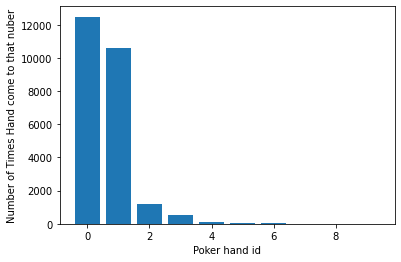

In [10]:
plt.bar(poker_hands, [poker_no_data[i] for i in poker_no_data], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of Times Hand come to that nuber')

In [11]:
x = dataset.drop(['classes'], axis=1)
y = dataset['classes']

In [23]:
x_test_data = dataset_test.drop(['classes'], axis=1)
y_test_data = dataset_test['classes']

In [14]:
# spliting data in train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42) # here 25% dataset will be of testing and 75% will be for training

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

for i in range(1,25):
    knc = KNeighborsClassifier(i)
    knc.fit(X_train, y_train)
    print("For K = ",i);
    print(classification_report(y_test, knc.predict(X_test)))
    print("-------------------------------------------------------------------------")

For K =  1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      0.60      0.59      3134
           1       0.47      0.47      0.47      2630
           2       0.15      0.14      0.15       310
           3       0.09      0.09      0.09       126
           4       0.08      0.08      0.08        25
           5       0.07      0.08      0.08        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1

    accuracy                           0.50      6253
   macro avg       0.15      0.15      0.15      6253
weighted avg       0.50      0.50      0.50      6253

-------------------------------------------------------------------------
For K =  2


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.83      0.67      3134
           1       0.52      0.31      0.39      2630
           2       0.26      0.05      0.08       310
           3       0.08      0.01      0.01       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.55      6253
   macro avg       0.16      0.13      0.13      6253
weighted avg       0.51      0.55      0.50      6253

-------------------------------------------------------------------------
For K =  3


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.57      0.67      0.62      3134
           1       0.48      0.46      0.47      2630
           2       0.21      0.05      0.08       310
           3       0.16      0.02      0.04       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.53      6253
   macro avg       0.16      0.13      0.13      6253
weighted avg       0.50      0.53      0.51      6253

-------------------------------------------------------------------------
For K =  4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.78      0.66      3134
           1       0.51      0.37      0.43      2630
           2       0.23      0.05      0.09       310
           3       0.20      0.05      0.08       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.55      6253
   macro avg       0.17      0.14      0.14      6253
weighted avg       0.52      0.55      0.52      6253

-------------------------------------------------------------------------
For K =  5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.70      0.64      3134
           1       0.50      0.47      0.49      2630
           2       0.17      0.02      0.04       310
           3       0.06      0.01      0.01       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.55      6253
   macro avg       0.15      0.13      0.13      6253
weighted avg       0.51      0.55      0.52      6253

-------------------------------------------------------------------------
For K =  6


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.76      0.66      3134
           1       0.52      0.42      0.46      2630
           2       0.16      0.02      0.03       310
           3       0.21      0.02      0.04       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.56      6253
   macro avg       0.16      0.14      0.13      6253
weighted avg       0.52      0.56      0.53      6253

-------------------------------------------------------------------------
For K =  7


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      0.71      0.64      3134
           1       0.51      0.46      0.48      2630
           2       0.11      0.01      0.02       310
           3       0.22      0.02      0.03       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.55      6253
   macro avg       0.16      0.13      0.13      6253
weighted avg       0.52      0.55      0.53      6253

-------------------------------------------------------------------------
For K =  8


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      0.76      0.66      3134
           1       0.53      0.45      0.48      2630
           2       0.11      0.01      0.02       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.14      0.13      0.13      6253
weighted avg       0.53      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  9


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.72      0.65      3134
           1       0.52      0.48      0.50      2630
           2       0.09      0.01      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.56      6253
   macro avg       0.13      0.13      0.13      6253
weighted avg       0.52      0.56      0.54      6253

-------------------------------------------------------------------------
For K =  10


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.53      0.45      0.49      2630
           2       0.04      0.00      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.13      0.14      0.13      6253
weighted avg       0.53      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  11


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.73      0.66      3134
           1       0.52      0.48      0.50      2630
           2       0.21      0.01      0.02       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.15      0.14      0.13      6253
weighted avg       0.53      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  12


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.53      0.46      0.49      2630
           2       0.17      0.01      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.14      0.14      0.13      6253
weighted avg       0.53      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  13


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.74      0.66      3134
           1       0.52      0.47      0.50      2630
           2       0.12      0.00      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.14      0.13      0.13      6253
weighted avg       0.53      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  14


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.53      0.46      0.49      2630
           2       0.17      0.00      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.14      0.14      0.13      6253
weighted avg       0.53      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  15


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.74      0.66      3134
           1       0.53      0.48      0.50      2630
           2       0.33      0.01      0.02       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.16      0.14      0.13      6253
weighted avg       0.54      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  16


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.53      0.45      0.49      2630
           2       0.14      0.00      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.14      0.14      0.13      6253
weighted avg       0.53      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  17


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67      3134
           1       0.53      0.47      0.50      2630
           2       0.29      0.01      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.16      0.14      0.13      6253
weighted avg       0.54      0.57      0.54      6253

-------------------------------------------------------------------------
For K =  18


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.53      0.46      0.50      2630
           2       0.50      0.01      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.58      6253
   macro avg       0.18      0.14      0.13      6253
weighted avg       0.55      0.58      0.55      6253

-------------------------------------------------------------------------
For K =  19


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67      3134
           1       0.53      0.47      0.50      2630
           2       0.29      0.01      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.57      6253
   macro avg       0.16      0.14      0.13      6253
weighted avg       0.54      0.57      0.55      6253

-------------------------------------------------------------------------
For K =  20


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.77      0.68      3134
           1       0.54      0.46      0.50      2630
           2       0.50      0.01      0.01       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.58      6253
   macro avg       0.18      0.14      0.13      6253
weighted avg       0.56      0.58      0.55      6253

-------------------------------------------------------------------------
For K =  21


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.54      0.47      0.50      2630
           2       0.33      0.01      0.02       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.58      6253
   macro avg       0.16      0.14      0.13      6253
weighted avg       0.55      0.58      0.55      6253

-------------------------------------------------------------------------
For K =  22


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.54      0.47      0.50      2630
           2       0.50      0.01      0.02       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.58      6253
   macro avg       0.18      0.14      0.13      6253
weighted avg       0.55      0.58      0.55      6253

-------------------------------------------------------------------------
For K =  23


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.76      0.67      3134
           1       0.54      0.47      0.50      2630
           2       0.00      0.00      0.00       310
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.58      6253
   macro avg       0.13      0.14      0.13      6253
weighted avg       0.53      0.58      0.55      6253

-------------------------------------------------------------------------
For K =  24
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      3134
           1       0.54      0.47      0.50      2630
           2       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#here we can see that accuracy for each value of K isa betn 54% to 57% on the training dataset.

In [21]:
#Now use for the Testing Datasert

In [26]:
for i in range(1,5):
    knc = KNeighborsClassifier(i)
    knc.fit(X_train, y_train)
    print("For K = ",i);
    print(classification_report(y_test_data, knc.predict(x_test_data)))
    print("-------------------------------------------------------------------------")

For K =  1
              precision    recall  f1-score   support

           0       0.59      0.60      0.59    501209
           1       0.47      0.47      0.47    422498
           2       0.13      0.12      0.13     47622
           3       0.10      0.10      0.10     21121
           4       0.06      0.05      0.06      3885
           5       0.03      0.03      0.03      1996
           6       0.03      0.02      0.02      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.51   1000000
   macro avg       0.14      0.14      0.14   1000000
weighted avg       0.51      0.51      0.51   1000000

-------------------------------------------------------------------------
For K =  2


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.82      0.67    501209
           1       0.52      0.32      0.39    422498
           2       0.19      0.04      0.06     47622
           3       0.15      0.01      0.03     21121
           4       0.06      0.00      0.01      3885
           5       0.00      0.00      0.00      1996
           6       0.20      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.55   1000000
   macro avg       0.17      0.12      0.12   1000000
weighted avg       0.51      0.55      0.50   1000000

-------------------------------------------------------------------------
For K =  3


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.67      0.62    501209
           1       0.49      0.46      0.47    422498
           2       0.18      0.04      0.07     47622
           3       0.16      0.02      0.04     21121
           4       0.08      0.01      0.01      3885
           5       0.11      0.00      0.00      1996
           6       0.15      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.53   1000000
   macro avg       0.17      0.12      0.12   1000000
weighted avg       0.51      0.53      0.52   1000000

-------------------------------------------------------------------------
For K =  4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.77      0.66    501209
           1       0.52      0.38      0.44    422498
           2       0.18      0.04      0.07     47622
           3       0.14      0.02      0.04     21121
           4       0.07      0.01      0.01      3885
           5       0.05      0.00      0.00      1996
           6       0.15      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.55   1000000
   macro avg       0.17      0.12      0.12   1000000
weighted avg       0.52      0.55      0.52   1000000

-------------------------------------------------------------------------
